In [15]:
import matplotlib as mpl
from pylab import *
from qutip import *
from matplotlib import cm
import imageio

def animate_bloch(states, duration=0.1, save_all=False):
    b = Bloch()
    b.vector_color = ['r']
    b.view = [-40,30]
    images=[]
    try:
        length = len(states)
    except:
        length = 1
        states = [states]
    nrm = mpl.colors.Normalize(0,length)
    colors = cm.cool(nrm(range(length))) 

    b.point_color = list(colors) 
    b.point_marker = ['o']
    b.point_size = [30]
    
    for i in range(length):
        b.clear()
        b.add_states(states[i])
        b.add_states(states[:(i+1)],'point')
        if save_all:
            b.save(dirc='tmp') 
            filename="tmp/bloch_%01d.png" % i
        else:
            filename='temp_file.png'
            b.save(filename)
        images.append(imageio.imread(filename))
        
    imageio.mimsave('bloch_anim.gif', images, duration=duration)

In [16]:
states = []
thetas = linspace(0,pi,21)
for theta in thetas:
    states.append((cos(theta/2)*basis(2,0) + sin(theta/2)*basis(2,1)).unit())

animate_bloch(states, duration=0.1, save_all=False)

/var/folders/n5/sr7wwb8n1wggd7jsk_k37l_w0000gn/T/ipykernel_26634/622662554.py:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


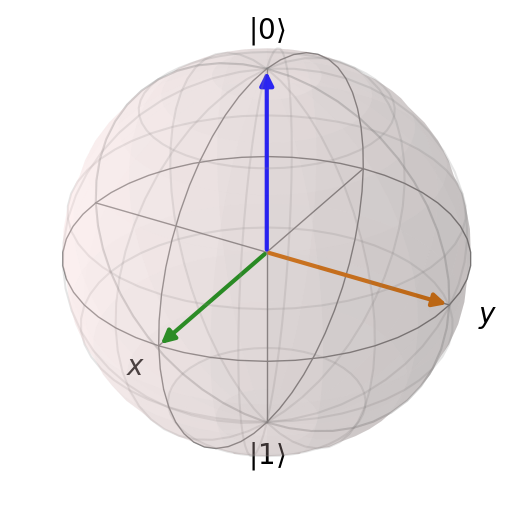

In [17]:
b = qutip.Bloch()
x = (qutip.basis(2, 0) + (1+0j)*qutip.basis(2, 1)).unit()
y = (qutip.basis(2, 0) + (0+1j)*qutip.basis(2, 1)).unit()
z = (qutip.basis(2, 0) + (0+0j)*qutip.basis(2, 1)).unit()
b.add_states([x, y, z])
b.render()
b.show()